In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


**1-Dataset**

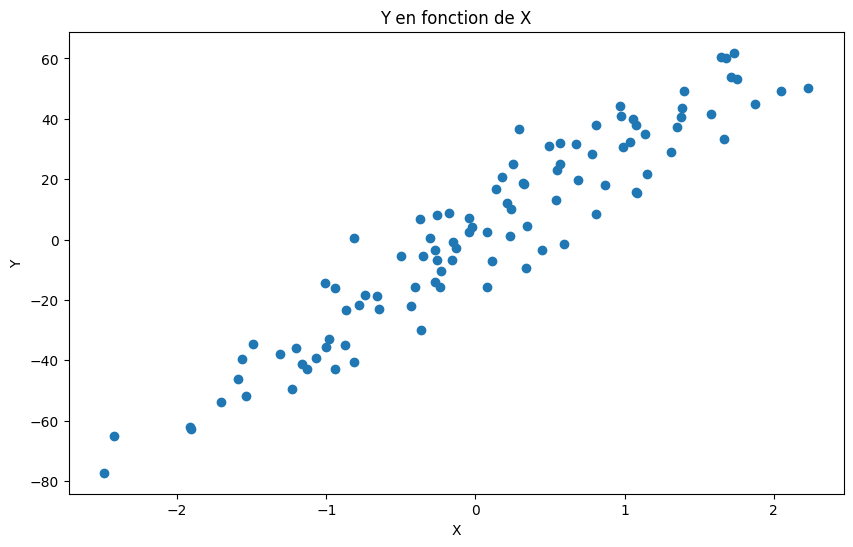

In [3]:
# 1. Generating and plotting the dataset
plt.figure(figsize=(10, 6))
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y en fonction de X')
plt.show()

In [4]:
print(x.shape)
# Reshaping y to ensure it has the correct dimensions
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [5]:
theta = np.random.randn(2, 1)
print(theta.shape)

(2, 1)


In [6]:
x_b = np.c_[np.ones((x.shape[0], 1)), x]

**Model Linéare**

In [7]:
def model(x, theta):
    return x.dot(theta)


**3- La fonction Cout**

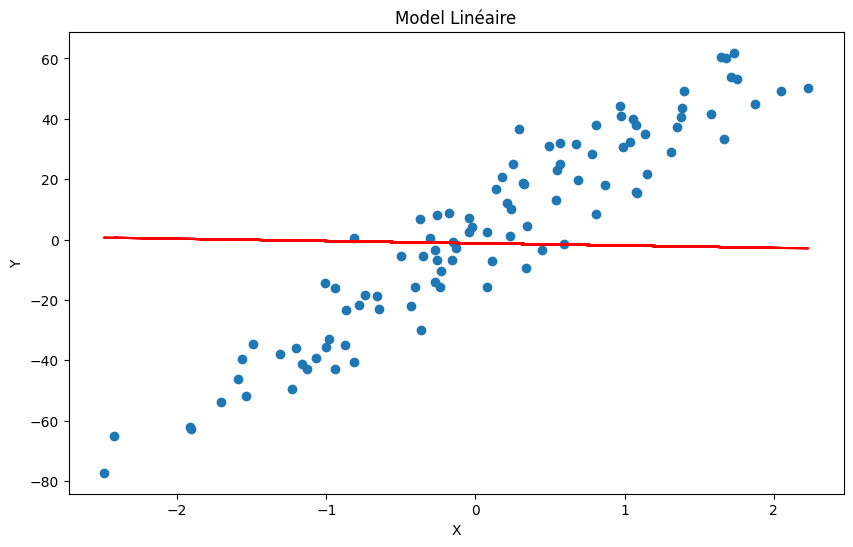

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], y)
plt.plot(x[:, 0], model(x_b, theta), color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model Linéaire')
plt.show()


In [9]:
def cost_function(x, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((model(x, theta) - y) ** 2)
print("Initial cost:", cost_function(x_b, y, theta))




Initial cost: 569.8314696687106


**4-deseent de gradient**

In [10]:
def grad(x, y, theta):
    m = len(y)
    return (1/m) * x.T.dot(x.dot(theta) - y)


In [11]:
def gradient_descent(x, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(x, y, theta)
        cost_history[i] = cost_function(x,y,theta)
    return theta,cost_history

**3-Entrainment du model**

In [12]:
theta_final ,cost_history = gradient_descent(x_b, y, theta, learning_rate=0.01, n_iterations=1000)
print("Final theta:", theta_final)

Final theta: [[ 0.51316143]
 [29.56059075]]


In [13]:
predictions = model(x_b, theta_final)

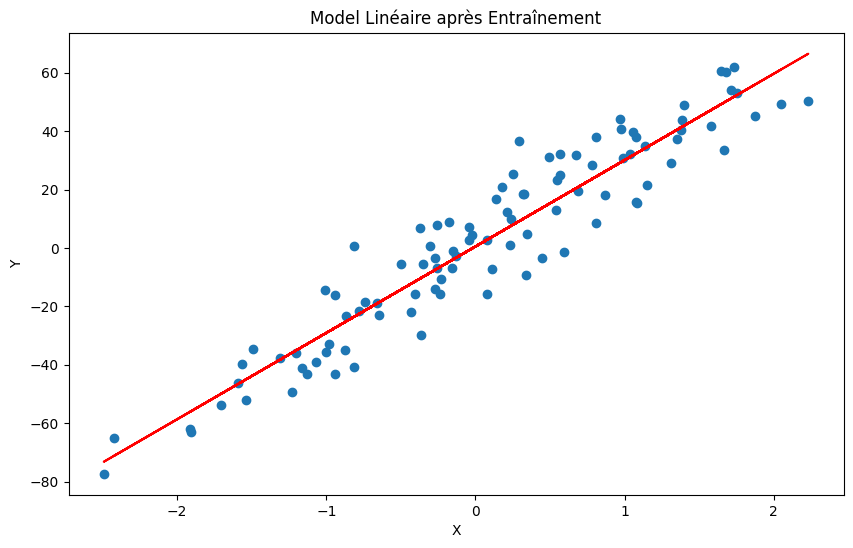

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], y)
plt.plot(x[:, 0], predictions, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model Linéaire après Entraînement')
plt.show()

**6-courbe D'apprentissage**

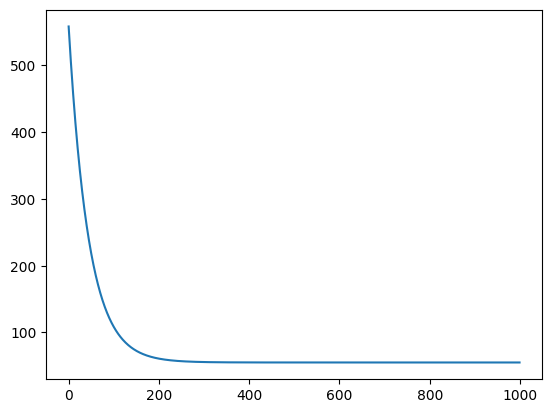

In [15]:
plt.plot(range(1000),cost_history)

**7-Coefficient de determination**

In [17]:
def coef_determination(y,pred):
    u= ((y - pred)**2).sum()
    v= ((y - y.mean())**2).sum()
    return 1 - (u/v)

In [19]:
coef_determination(y,predictions)

0.8975266541361024